<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Programacion_101/blob/main/01_Introduccion_a_Python/Examenes/90_Examen9_programacion_101_grupo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica Final - Programación 101**
## Maestría de Ciencia de Datos e Inteligencia Artificial
### Programación 101

**Profesor del curso:**  
Mg. John Caballero Terrazos  
[jcaballero@utec.edu.pe](mailto:jcaballero@utec.edu.pe)

**Integrantes:**  
Piero Diaz
[piero.diaz.c@utec.edu.pe](mailto:piero.diaz@utec.edu.pe)

Rodrigo Guedes
[rodrigo.guedes@utec.edu.pe](mailto:rodrigo.guedes@utec.edu.pe)

Brajan Nieto
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

Julio Salgado
[julio.salgado@utec.edu.pe](mailto:julio.salgado@utec.edu.pe)


<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

In [ ]:
# Librerías que se usaron en el desarrollo de la práctica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm #Esto lo use a para imputación de valores

Análisis de los datos

In [ ]:
# Cargar el archivo CSV
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

In [ ]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(df.describe())


Resumen estadístico de las columnas numéricas:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Resumen estadístico de las columnas categóricas
print("\nResumen estadístico de las columnas categóricas:")
print(df.describe(include=['object']))


Resumen estadístico de las columnas categóricas:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No  

### Analisis de clientes que abandonan


In [ ]:
client_churn = df[df['Churn']== 'Yes']
client_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332
std,0.435799,19.531123,24.666053
min,0.000000,1.000000,18.850000
25%,0.000000,2.000000,56.150000
50%,0.000000,10.000000,79.650000
75%,1.000000,29.000000,94.200000
max,1.000000,72.000000,118.350000


In [ ]:
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(gender_churn)

Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


In [ ]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(contract_churn)

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<ipython-input-24-cbabfa31c1d1>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_var = df.groupby([var, 'Churn']).size().unstack().fillna(0)


KeyError: 'Tenure'

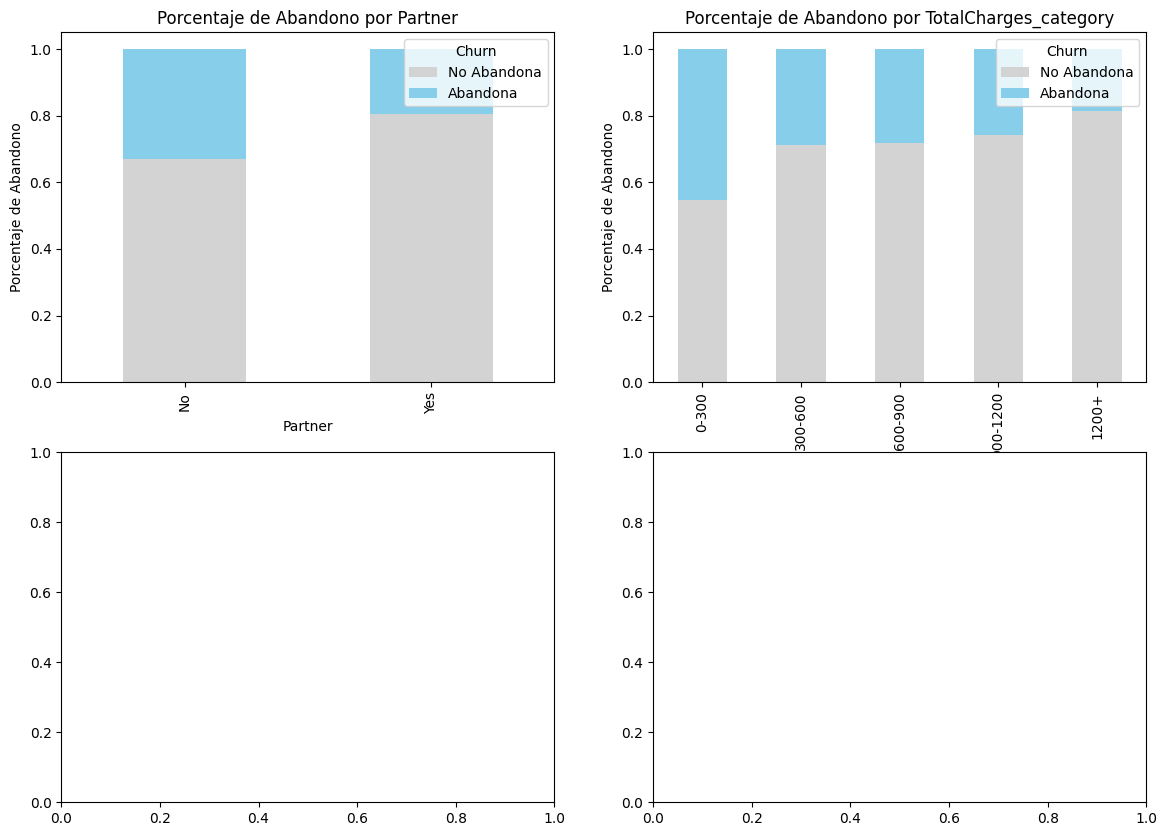

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convertir 'Churn' a binario

# Definir las variables de interés
variables = ['Partner', 'TotalCharges', 'Tenure', 'Contract']

# Crear una figura para los gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Graficar el porcentaje de abandono por cada variable
for ax, var in zip(axes.flatten(), variables):
    if var == 'TotalCharges':  # Para TotalCharges, transformarlo a categorías
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df['TotalCharges_category'] = pd.cut(df['TotalCharges'], bins=[0, 300, 600, 900, 1200, float('inf')],
                                            labels=['0-300', '300-600', '600-900', '900-1200', '1200+'])
        var = 'TotalCharges_category'

    churn_by_var = df.groupby([var, 'Churn']).size().unstack().fillna(0)
    churn_by_var = churn_by_var.div(churn_by_var.sum(axis=1), axis=0)  # Convertir a porcentaje

    churn_by_var.plot(kind='bar', stacked=True, ax=ax, color=['lightgray', 'skyblue'])
    ax.set_title(f'Porcentaje de Abandono por {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Porcentaje de Abandono')
    ax.legend(title='Churn', labels=['No Abandona', 'Abandona'], loc='upper right')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [ ]:
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print(senior_churn)

Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


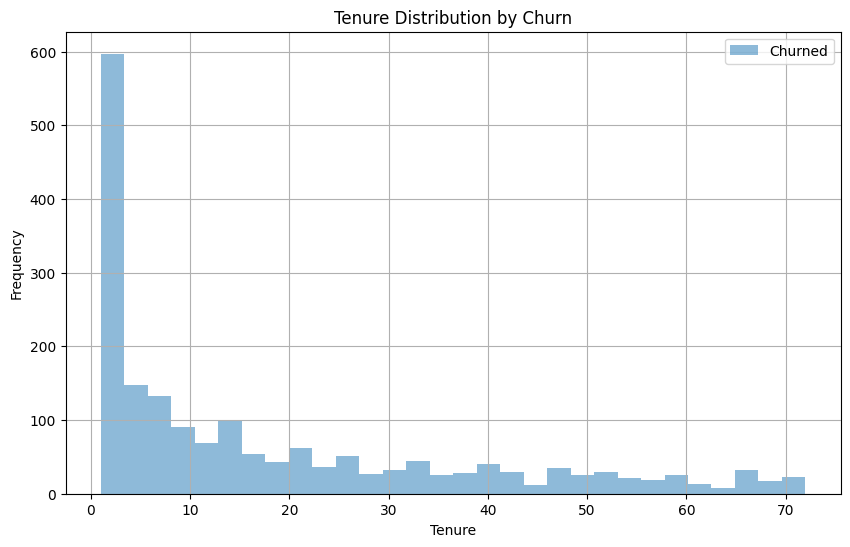

In [ ]:
# 3. Tenure vs Churn (continuous variable analysis)
plt.figure(figsize=(10,6))
df[df['Churn'] == 'Yes']['tenure'].hist(alpha=0.5, label='Churned', bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


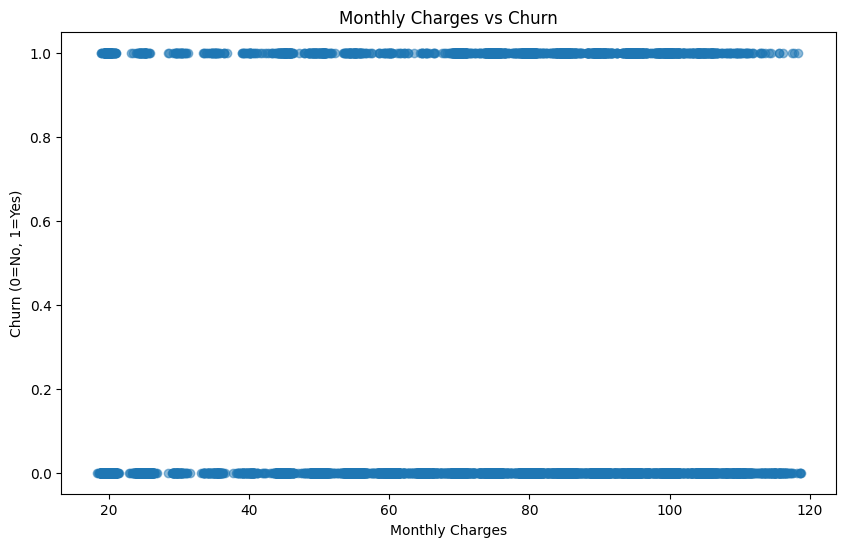

In [ ]:
df['Churn_binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(10,6))
plt.scatter(df['MonthlyCharges'], df['Churn_binary'], alpha=0.5)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn (0=No, 1=Yes)')
plt.show()


Generando scatter matrix plot...


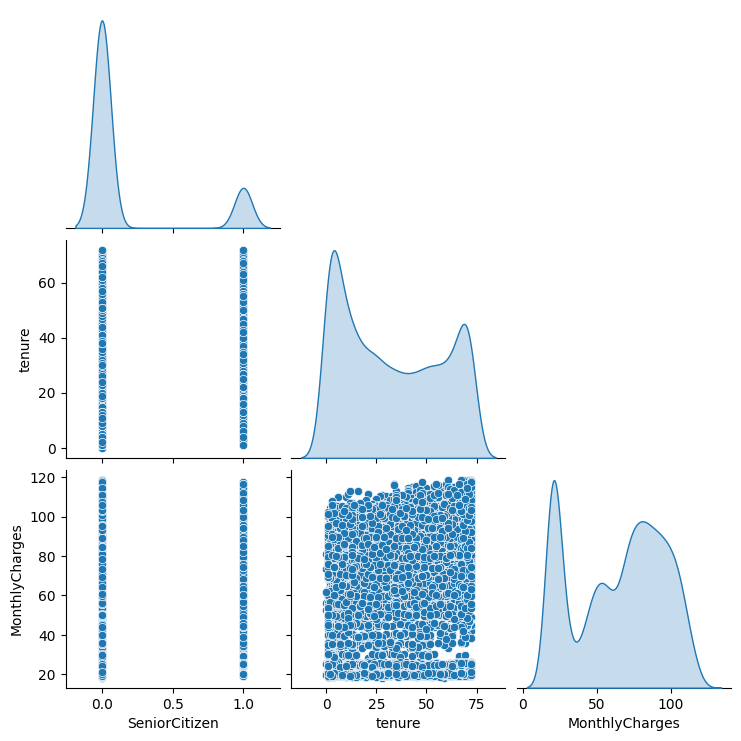

In [ ]:
# Generar un scatter matrix plot para las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_cols) > 1:
    print("\nGenerando scatter matrix plot...")
    sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
    plt.show()
else:
    print("\nNo hay suficientes columnas numéricas para generar un scatter matrix plot.")


Generando heatmap de correlación...


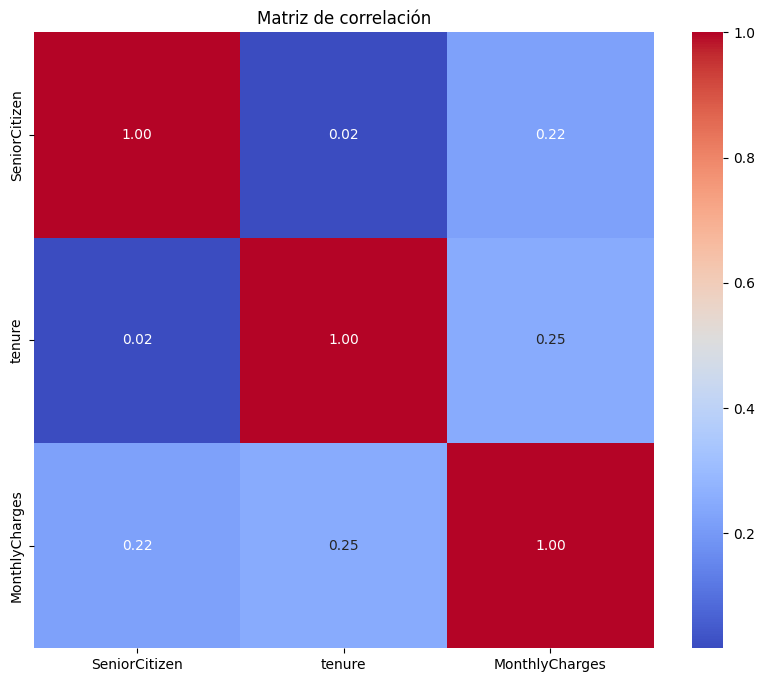

In [ ]:
# Visualizar la correlación entre las variables numéricas con un heatmap
if len(numerical_cols) > 1:
    print("\nGenerando heatmap de correlación...")
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Matriz de correlación')
    plt.show()
else:
    print("\nNo hay suficientes columnas numéricas para generar un heatmap de correlación.")



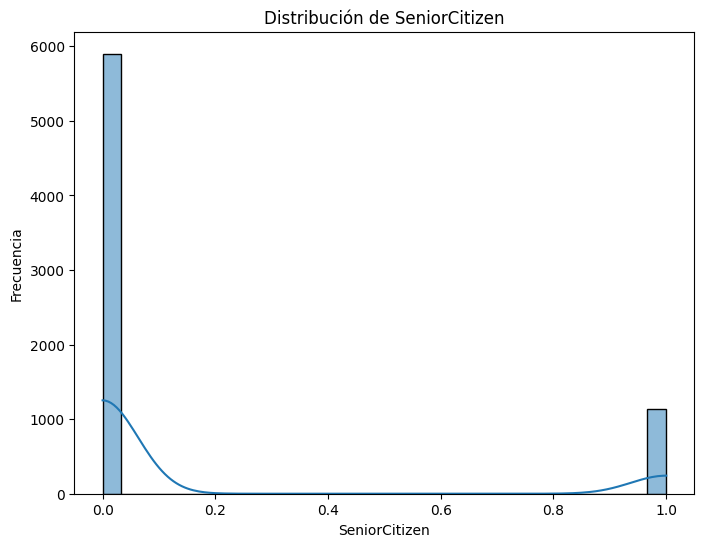

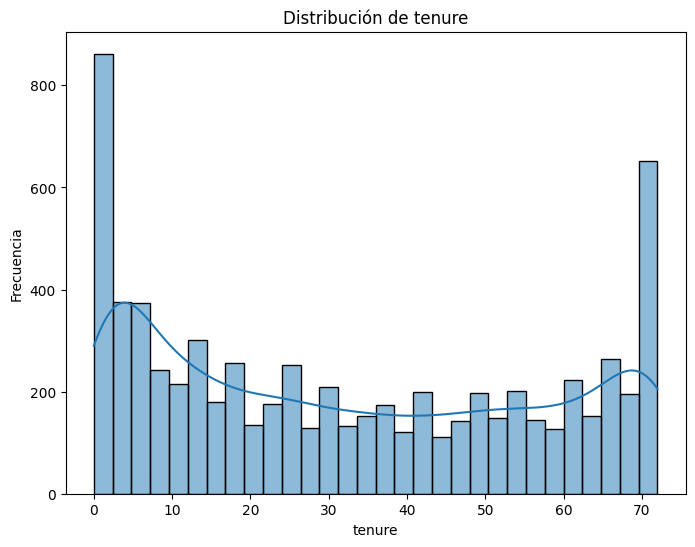

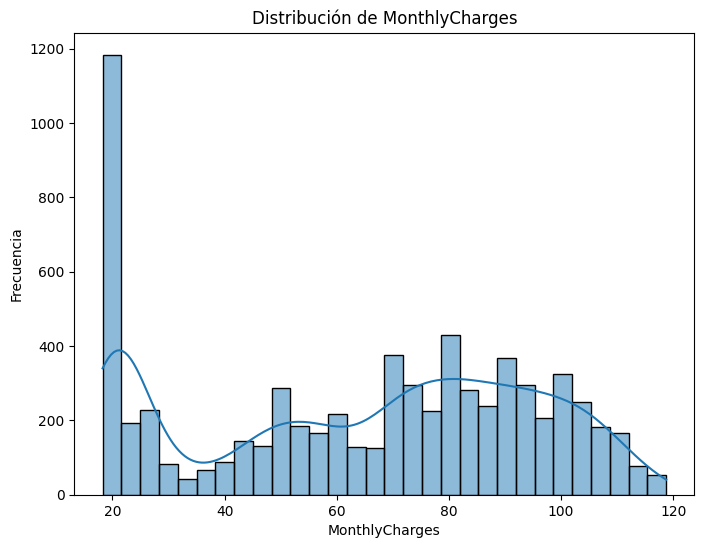


Análisis completado.


In [ ]:
# Gráfico de distribución para cada variable numérica
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

print("\nAnálisis completado.")


In [ ]:
# Data Preprocessing

# etiquetado binario
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']) # Male = 1, Fem = 0
df['Partner'] = le.fit_transform(df['Partner']) #Yes = 1
df['Dependents'] = le.fit_transform(df['Dependents']) # Yes = 1
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn']) # Yes = 1

# One hot Encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup','DeviceProtection', 'TechSupport',
                                 'Contract', 'PaymentMethod','StreamingMovies', 'StreamingTV'], drop_first=False)

df = df.apply(lambda x: x.astype(int) if x.dtypes == 'bool' else x) # convert booleans to 1 and 0

# columna inncesaria
df = df.drop(columns = ['customerID'])

#print
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,1,0,0


## Pregunta 1

1) Carga diabetes.csv en un DataFrame df_diabetes.